In [27]:
import cv2

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 250)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 250)
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
count = 0
while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    cv2.imwrite("frame%d.jpg" % count, frame)  
    c = cv2.waitKey(1)
    if c == 27:
        break
    if (cv2.waitKey(1) == 27) or (count == 10):                     # exit if Escape is hit
        break
    count += 1
cap.release()
cv2.destroyAllWindows()

5


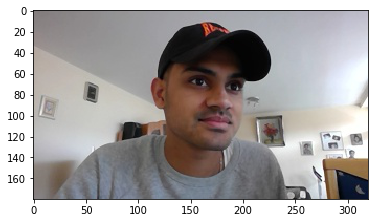

In [28]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
values = list(range(10))
print (random.choice(values))
img=mpimg.imread("frame%d.jpg" % random.choice(values))
img1=mpimg.imread("frame%d.jpg" % random.choice(values))

imgplot = plt.imshow(img)                 
#plt.imshow(image.load_img("frame%d.jpg" % random.choice(values)))
#cv2.implot("frame%d.jpg" % random.choice(values), frame)  
cv2.destroyAllWindows()

In [29]:
import numpy as np
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
#glasses_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses')
#convert images to different color spaces
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

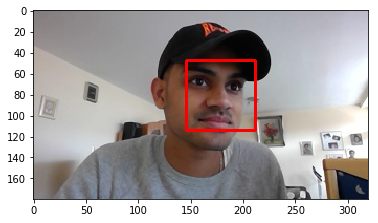

In [30]:
#cv2.CascadeClassifier.detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]]) → objects
detect = False
faces = face_cascade.detectMultiScale(gray, 1.3, 2)
#check for faces

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(250,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    #eyes = eye_cascade.detectMultiScale(roi_gray)
    #for (ex,ey,ew,eh) in eyes:
    #    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,250,0),2)
    #glasses = eye_cascade.detectMultiScale(roi_gray)
    #for (gx,gy,gw,gh) in glasses:
    #    cv2.rectangle(roi_color,(gx,gy),(gx+gw,gy+gh),(0,250,0),2)        
detect = True
if detect == False:
    Print("No Face Detected.. using SVM HOG")

imgplot = plt.imshow(img)  
cv2.imwrite("cropped.jpg",roi_color)
#cv2.imwrite("hog.jpg", img1)  
#cv2.imshow('img',img)
cv2.destroyAllWindows()

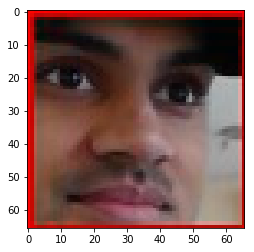

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img1 = cv2.imread("cropped.jpg")
img = cv2.imread("hog.jpg")
plt.imshow(img1) 